<a href="https://colab.research.google.com/github/adenning-1/QNC-2025/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr



In [9]:
data = {
    "Age": [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17],
    "Wing Length": [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]}
df = pd.DataFrame(data)


1) Plot relationship between age and wing length

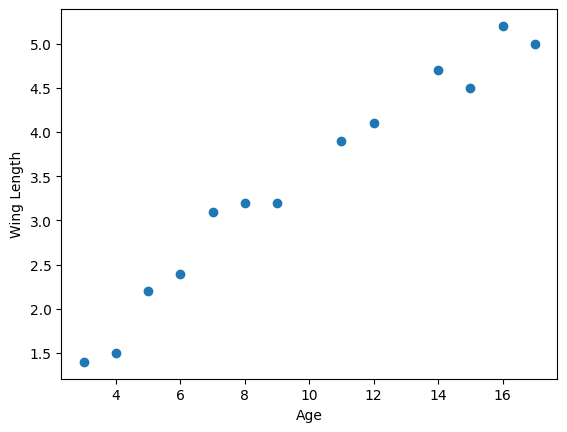

In [11]:
plt.scatter(df["Age"], df["Wing Length"])
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.show()


2) Calculate and plot the regression line.

Slope: 0.265, Intercept: 0.830, p-value: 0.000


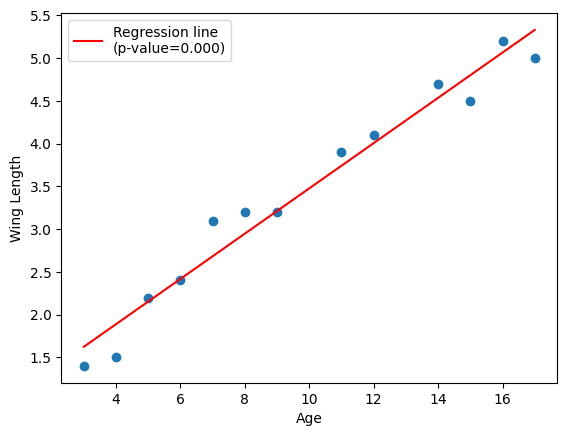

In [19]:
# Calculate linear regression
X = sm.add_constant(df["Age"]) # this adds an intercept
Y = df["Wing Length"]
model = sm.OLS(Y, X).fit()
# Grab slope/intercept
intercept, slope = model.params
p_value = model.pvalues["Age"]
# Print regression line
print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}, p-value: {p_value:.3f}")
# Add to plot
plt.scatter(df["Age"], df["Wing Length"])
plt.plot(df['Age'], model.predict(X), color='red', label=f'Regression line\n(p-value={p_value:.3f})')
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.legend()
plt.show()


3) Can you reject HO: b = 0?

Yes, this linear regression has a p-value of 0 for the null hypothesis that b = 0, so we can reject the null hypothesis.

4) Calculate and plot the confidence intervals on the slope of the regression.

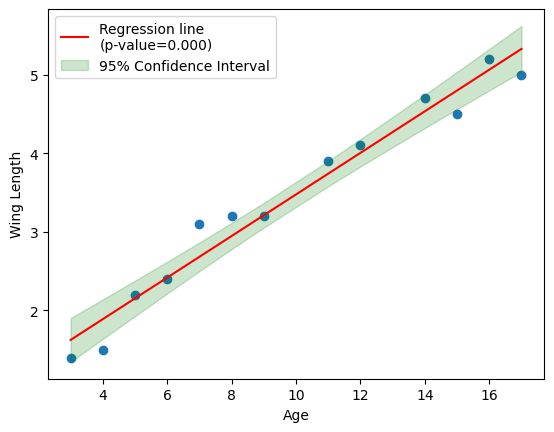

In [20]:
# GET CIs
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha = 0.05) # sets to 95%
# Add to plot
plt.scatter(df["Age"], df["Wing Length"])
plt.plot(df['Age'], model.predict(X), color='red', label=f'Regression line\n(p-value={p_value:.3f})')
plt.fill_between(df['Age'], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='green', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.legend()
plt.show()

5) Calculate r2 (the coefficient of determination)

In [21]:
r_squared = model.rsquared
print(f"R-squared: {r_squared:.3f}")

R-squared: 0.963


6) Calculate Pearson's r.

In [23]:
r, p_value = pearsonr(df["Age"], df["Wing Length"])
print(f"Pearson's r: {r:.3f}, p-value: {p_value:.3f}")

Pearson's r: 0.982, p-value: 0.000


7) Add some noise to the data and see how the regression changes

Slope: 0.313, Intercept: -0.387, p-value: 0.266


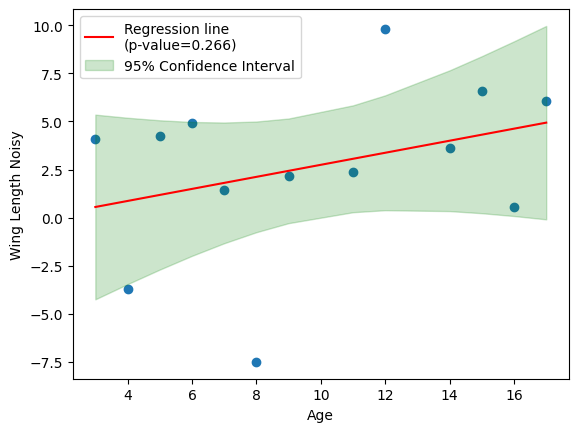

R-squared: 0.111
Pearson's r: 0.333, p-value: 0.266


In [50]:
# Generate a random distribution of values from 0-2 and add to the
df["Wing Length Noisy"] = df["Wing Length"] + np.random.normal(0, 5, len(df))

# Redo Regression
# Calculate linear regression
X = sm.add_constant(df["Age"]) # this adds an intercept
Y = df["Wing Length Noisy"]
model = sm.OLS(Y, X).fit()
# Grab slope/intercept
intercept, slope = model.params
p_value = model.pvalues["Age"]
# Print regression line
print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}, p-value: {p_value:.3f}")
# GET CIs
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha = 0.05) # sets to 95%
# Add to plot
plt.scatter(df["Age"], df["Wing Length Noisy"])
plt.plot(df['Age'], model.predict(X), color='red', label=f'Regression line\n(p-value={p_value:.3f})')
plt.fill_between(df['Age'], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='green', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Age")
plt.ylabel("Wing Length Noisy")
plt.legend()
plt.show()

r_squared = model.rsquared
print(f"R-squared: {r_squared:.3f}")

r, p_value = pearsonr(df["Age"], df["Wing Length Noisy"])
print(f"Pearson's r: {r:.3f}, p-value: {p_value:.3f}")


Adding noise substantially reduces the R-squared value, brings the Pearson's r value closer to 0, widens the confidence intervals, and reduces the significance of the regression. Adding more noise (i.e. from a random distribution of 0-5 instead of 0-1) makes this difference larger.